Решается уравнение  
$\frac{\partial{C}}{\partial{t}} + \vec{b}\cdot\nabla C  - \nabla \cdot D \nabla C = 0$,  
$\vec{b} = (1, 0)^T$
\begin{equation}
D = 
\begin{pmatrix}
d_x & 0 \\
0 & d_y
\end{pmatrix}
\end{equation}
Область определения $\widetilde{\Omega} = (0, +\infty) \times (-\infty, +\infty)$, то есть x > 0  
Начальное условие: $C(x, y, 0) = 0$ в $\widetilde{\Omega}$  
Рассмотрив два вида граничных условий  
Первый:  
\begin{equation}
С(0, y, t) =
\begin{cases}
1, |y| < a \\
0, |y| > a
\end{cases}
\end{equation}
a = 10  
Второй:  
\begin{equation}
С(0, y, t) =
\begin{cases}
1, y < 0 \\
0, y > 0
\end{cases}
\end{equation}
$\newline$
Используем метод конечных разностей:  
$\frac{C_{i,j}^{n+1} - C_{i,j}^{n}}{\Delta t} + \frac{C_{i+1,j}^{n} - C_{i-1,j}^{n}}{h} - d_x \cdot \frac{C_{i+1,j}^{n} - 2 \cdot C_{i,j}^{n} + C_{i-1,j}^{n}}{h^2} - d_y\cdot \frac{C_{i,j+1}^{n} - 2\cdot C_{i,j}^{n} + C_{i,j-1}^{n}}{h^2} = 0$  
Используется приближение, ограничивающее область сеткой $[400]\times[400]$ и $[800]\times[800]$, где считаются однородными граничные условия типа Дирихле.

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import copy
import time
from matplotlib import cm
from mpl_toolkits.mplot3d.axes3d import get_test_data
from scipy.integrate import quad

In [2]:
# В начале С = 0
# Nt - номер узла сетки по оси t
# Nx - номер узла сетки по оси x
# Ny - номер узла сетки по оси y
# 0 есть нуль t
# 0 есть нуль x
# Ny // 2 есть нуль y
# Na задает границу а

def start_condition(c, Nx, Ny):
    for i in range(Nx + 1):
        for j in range(Ny + 1):
            c[i][j] = 0
            
def boundary_condition1(c, Ny, Na):
    for j in range(Ny + 1):
        if ((Ny // 2 - Na < j) and (Ny // 2 + Na > j)):
            c[0][j] = 1
        else:
            c[0][j] = 0

def boundary_condition2(c, Ny):
    for j in range(Ny + 1):
        if (j < Ny // 2):
            c[0][j] = 1
        else:
            c[0][j] = 0

def method_of_finite_differences1(cp, cc, Nt, Nx, Ny, Na, A, B, C, D):
    boundary_condition1(cc, Ny, Na)
    for n in range(1, Nt + 1):
        for i in range(1, Nx):
            for j in range(1, Ny):
                cc[i][j] = A * cp[i][j] + B * cp[i + 1][j] + C * cp[i - 1][j] + D * (cp[i][j + 1] + cp[i][j - 1])
        cp = cc

def method_of_finite_differences2(cp, cc, Nt, Nx, Ny, Na, A, B, C, D):
    boundary_condition2(cc, Ny)
    for n in range(1, Nt + 1):
        for i in range(1, Nx):
            for j in range(1, Ny):
                cc[i][j] = A * cp[i][j] + B * cp[i + 1][j] + C * cp[i - 1][j] + D * (cp[i][j + 1] + cp[i][j - 1])
        cp = cc

In [3]:
T = 50
a = 10
# dx = 1e-4
# dy = 1e-3
dx = 0
dy = 0
x_size = 200
y_size = 200
h = 1 / 4
t = 1
Nt = int(T / t)
Nx = int(x_size / h)
Ny = int(y_size / h)
Na = int(2 * a / h)
A = 1 - t * (1 / h + 2 * dx / (h ** 2) + 2 * dy / (h ** 2))
B = dx * t / (h ** 2)
C = dx * t / (h ** 2) + t / h
D = dy * t / (h ** 2)
cp = np.zeros((Nx + 1, Ny + 1)) # prev time c
cc = np.zeros((Nx + 1, Ny + 1)) # curr time c
start_condition(cp, Nx, Ny)
boundary_condition1(cp, Ny, Na)
method_of_finite_differences1(cp, cc, 5, Nx, Ny, Na, A, B, C, D)

C:\Users\user\AppData\Local\Temp\ipykernel_10356\4217847403.py:34: RuntimeWarning: overflow encountered in scalar multiply
  cc[i][j] = A * cp[i][j] + B * cp[i + 1][j] + C * cp[i - 1][j] + D * (cp[i][j + 1] + cp[i][j - 1])
C:\Users\user\AppData\Local\Temp\ipykernel_10356\4217847403.py:34: RuntimeWarning: invalid value encountered in scalar multiply
  cc[i][j] = A * cp[i][j] + B * cp[i + 1][j] + C * cp[i - 1][j] + D * (cp[i][j + 1] + cp[i][j - 1])


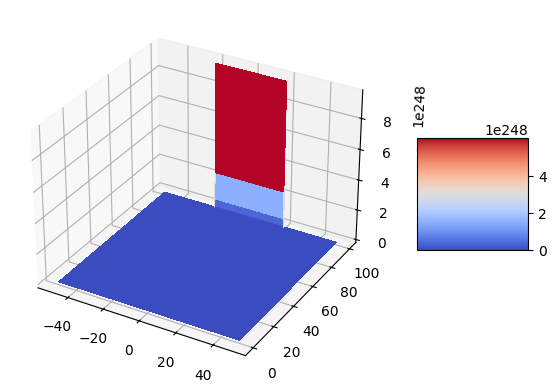

In [4]:
fig = plt.figure(figsize=plt.figaspect(0.5))
ax = fig.add_subplot(1, 1, 1, projection='3d')
X = np.arange(0, 100, h)
Y = np.arange(-50, 50, h)
Z = np.zeros((X.size, Y.size))
for i in range(X.size):
    for j in range(Y.size):
        Z[i][j] = cc[i][Ny // 2 - Y.size // 2 + j]
        
Y, X = np.meshgrid(Y, X)
surf = ax.plot_surface(Y, X, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.9, aspect=1)
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_16396\1014633362.py:23: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  I = quad(integral2, 0, T, args=(x, y))


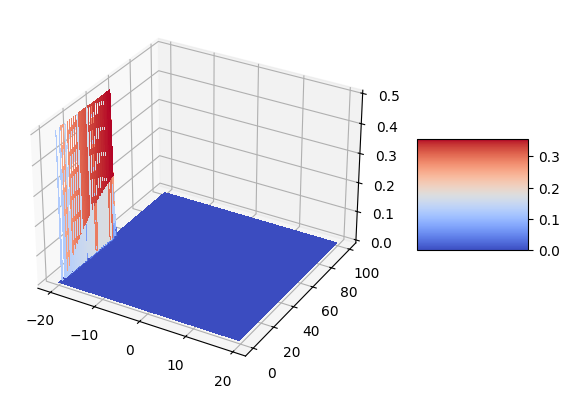

In [156]:
def integral1(t, x, y):
    return t ** (-1.5) * (math.erf((a + y) / (4 * dy * t) ** (1 / 2)) +
                          math.erf((a - y) / (4 * dy * t) ** (1 / 2))) *  math.exp(-((x - t) / (4 * dx * t) ** (1 / 2)) ** 2)

def integral2(t, x, y):
    return t ** (-1.5) * math.erfc(y / (4 * dy * t) ** (1 / 2)) *  math.exp(-((x - t) / (4 * dx * t) ** (1 / 2)) ** 2)


def C(x, y, integral_val):
    return x / ((16 * math.pi * dx) ** (1 / 2)) * integral_val

fig = plt.figure(figsize=plt.figaspect(0.5))
ax = fig.add_subplot(1, 1, 1, projection='3d')
h = 1 / 4
X = np.arange(0, 100, h)
Y = np.arange(-20, 20, h)
Z = np.zeros((X.size, Y.size))

for i in range(X.size):
    for j in range(Y.size):
        x = i * h
        y = j * h
        I = quad(integral2, 0, T, args=(x, y))
        Z[i][j] = C(x, y, I[0])
        
Y, X = np.meshgrid(Y, X)
surf = ax.plot_surface(Y, X, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.9, aspect=1)
plt.show()

# debugger jetBrains